<a href="https://colab.research.google.com/github/ckraju/python-data-analytics-2e/blob/master/Chapter_10_Sea_distance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import datetime

In [2]:
import json
import requests
ferrara = json.loads(requests.get('http://api.openweathermap.org/data/2.5/weather?q=Ferrara,IT&appid=5807ad2a45eb6bf4e81d137dafe74e15').text)
ferrara

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 44.8, 'lon': 11.8333},
 'dt': 1625821045,
 'id': 3177088,
 'main': {'feels_like': 300.14,
  'humidity': 44,
  'pressure': 1016,
  'temp': 300.05,
  'temp_max': 302.65,
  'temp_min': 297.09},
 'name': 'Provincia di Ferrara',
 'sys': {'country': 'IT',
  'id': 2038886,
  'sunrise': 1625801748,
  'sunset': 1625857175,
  'type': 2},
 'timezone': 7200,
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
   'icon': '01d',
   'id': 800,
   'main': 'Clear'}],
 'wind': {'deg': 0, 'gust': 4.47, 'speed': 1.79}}

In [3]:
list(ferrara.keys())

['coord',
 'weather',
 'base',
 'main',
 'visibility',
 'wind',
 'clouds',
 'dt',
 'sys',
 'timezone',
 'id',
 'name',
 'cod']

In [4]:
print('Coordinates = ', ferrara['coord'])
print('Weather = ', ferrara['weather'])
print('base = ', ferrara['base'])
print('main = ', ferrara['main'])
print('visibility = ', ferrara['visibility'])
print('wind = ', ferrara['wind'])
print('clouds = ', ferrara['clouds'])
print('dt = ', ferrara['dt'])
print('sys = ', ferrara['sys'])
print('id = ', ferrara['id'])
print('name = ', ferrara['name'])
print('cod = ', ferrara['cod'])

Coordinates =  {'lon': 11.8333, 'lat': 44.8}
Weather =  [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}]
base =  stations
main =  {'temp': 300.05, 'feels_like': 300.14, 'temp_min': 297.09, 'temp_max': 302.65, 'pressure': 1016, 'humidity': 44}
visibility =  10000
wind =  {'speed': 1.79, 'deg': 0, 'gust': 4.47}
clouds =  {'all': 0}
dt =  1625821045
sys =  {'type': 2, 'id': 2038886, 'country': 'IT', 'sunrise': 1625801748, 'sunset': 1625857175}
id =  3177088
name =  Provincia di Ferrara
cod =  200


In [5]:
ferrara['main']['temp']

300.05

In [6]:
#http://it.thetimenow.com/distance-calculator.php
#(Comacchio)
#ravenna['dist'] = 8
#cesena['dist'] = 14
#faenza['dist'] = 37
#ferrara_dist = 47
#bologna['dist'] = 71
#mantova['dist'] = 121 
#piacenza['dist'] = 200
#milano['dist'] = 250
#asti['dist'] = 315
#torino['dist'] = 357


In [7]:
def prepare(city,city_name):
    temp = [ ]
    humidity = [ ]
    pressure = [ ]
    description = [ ]
    dt = [ ]
    wind_speed = [ ]
    wind_deg = [ ]
    temp.append(city['main']['temp']-273.15)
    humidity.append(city['main']['humidity'])
    pressure.append(city['main']['pressure'])
    description.append(city['weather'][0]['description'])
    dt.append(city['dt'])
    wind_speed.append(city['wind']['speed'])
    wind_deg.append(city['wind']['deg'])
    headings = ['temp','humidity','pressure','description','dt','wind_speed','wind_deg']
    data = [temp,humidity,pressure,description,dt,wind_speed,wind_deg]
    df = pd.DataFrame(data,index=headings)
    city = df.T
    city['city'] = city_name
    city['day'] = city['dt'].apply(datetime.datetime.fromtimestamp)
    return city



In [8]:
t1 = prepare(ferrara,'ferrara')
t1

,temp,humidity,pressure,description,dt,wind_speed,wind_deg,city,day
0,26.9,44,1016,clear sky,1625821045,1.79,0,ferrara,2021-07-09 08:57:25


In [9]:
df_ferrara = t1
t2 = prepare(ferrara,'ferrara')
df_ferrara = df_ferrara.append(t2)
df_ferrara

,temp,humidity,pressure,description,dt,wind_speed,wind_deg,city,day
0,26.9,44,1016,clear sky,1625821045,1.79,0,ferrara,2021-07-09 08:57:25
0,26.9,44,1016,clear sky,1625821045,1.79,0,ferrara,2021-07-09 08:57:25


# Start Analysis

In [10]:
df_ferrara = pd.read_csv('ferrara_270615.csv')
df_milano = pd.read_csv('milano_270615.csv')
df_mantova = pd.read_csv('mantova_270615.csv')
df_ravenna = pd.read_csv('ravenna_270615.csv')
df_torino = pd.read_csv('torino_270615.csv')
df_asti = pd.read_csv('asti_270615.csv')
df_bologna = pd.read_csv('bologna_270615.csv')
df_piacenza = pd.read_csv('piacenza_270615.csv')
df_cesena = pd.read_csv('cesena_270615.csv')
df_faenza = pd.read_csv('faenza_270615.csv')

In [11]:
df_cesena

,Unnamed: 0,temp,humidity,pressure,description,dt,wind_speed,wind_deg,city,day,dist
0,0,23.34,82,1017,very heavy rain,1435387623,1.91,175.511,Cesena,2015-06-27 08:47:03,14
1,1,24.95,69,1018,very heavy rain,1435390801,2.01,159.500,Cesena,2015-06-27 09:40:01,14
2,2,25.67,73,1017,very heavy rain,1435394204,2.10,100.000,Cesena,2015-06-27 10:36:44,14
3,3,26.17,69,1017,very heavy rain,1435398652,3.10,120.000,Cesena,2015-06-27 11:50:52,14
4,4,27.07,61,1016,very heavy rain,1435402083,3.10,110.000,Cesena,2015-06-27 12:48:03,14
5,5,27.41,69,1016,very heavy rain,1435405721,3.60,110.000,Cesena,2015-06-27 13:48:41,14
6,6,27.38,65,1015,very heavy rain,1435409381,5.70,110.000,Cesena,2015-06-27 14:49:41,14
7,7,26.59,65,1014,very heavy rain,1435416585,5.10,110.000,Cesena,2015-06-27 16:49:45,14
8,8,27.16,65,1014,very heavy rain,1435420195,6.20,120.000,Cesena,2015-06-27 17:49:55,14
9,9,27.10,65,1014,very heavy rain,1435423927,6.70,120.000,Cesena,2015-06-27 18:52:07,14


In [12]:
dist = [df_ravenna['dist'][0],
     df_cesena['dist'][0],
     df_faenza['dist'][0],
     df_ferrara['dist'][0],
     df_bologna['dist'][0],
     df_mantova['dist'][0],
     df_piacenza['dist'][0],
     df_milano['dist'][0],
     df_asti['dist'][0],
     df_torino['dist'][0]
]
temp_max = [df_ravenna['temp'].max(),
     df_cesena['temp'].max(),
     df_faenza['temp'].max(),
     df_ferrara['temp'].max(),
     df_bologna['temp'].max(),
     df_mantova['temp'].max(),
     df_piacenza['temp'].max(),
     df_milano['temp'].max(),
     df_asti['temp'].max(),
     df_torino['temp'].max()
]
temp_min = [df_ravenna['temp'].min(),
     df_cesena['temp'].min(),
     df_faenza['temp'].min(),
     df_ferrara['temp'].min(),
     df_bologna['temp'].min(),
     df_mantova['temp'].min(),
     df_piacenza['temp'].min(),
     df_milano['temp'].min(),
     df_asti['temp'].min(),
     df_torino['temp'].min()
]
hum_min = [df_ravenna['humidity'].min(),
     df_cesena['humidity'].min(),
     df_faenza['humidity'].min(),
     df_ferrara['humidity'].min(),
     df_bologna['humidity'].min(),
     df_mantova['humidity'].min(),
     df_piacenza['humidity'].min(),
     df_milano['humidity'].min(),
     df_asti['humidity'].min(),
     df_torino['humidity'].min()
]
hum_max = [df_ravenna['humidity'].max(),
     df_cesena['humidity'].max(),
     df_faenza['humidity'].max(),
     df_ferrara['humidity'].max(),
     df_bologna['humidity'].max(),
     df_mantova['humidity'].max(),
     df_piacenza['humidity'].max(),
     df_milano['humidity'].max(),
     df_asti['humidity'].max(),
     df_torino['humidity'].max()
]

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

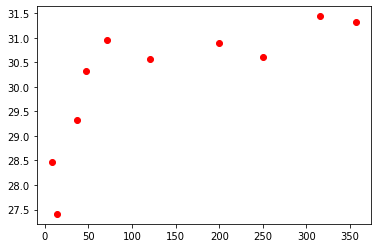

In [14]:
#temperatura massima
plt.plot(dist,temp_max,'ro')

In [15]:
x = np.array(dist)
y = np.array(temp_max)
x1 = x[x<100]
x1 = x1.reshape((x1.size,1))
y1 = y[x<100]
x2 = x[x>50]
x2 = x2.reshape((x2.size,1))
y2 = y[x>50]

In [16]:
from sklearn.svm import SVR
svr_lin1 = SVR(kernel='linear', C=1e3)
svr_lin2 = SVR(kernel='linear', C=1e3)
svr_lin1.fit(x1, y1)
svr_lin2.fit(x2, y2)
xp1 = np.arange(10,100,10).reshape((9,1))
xp2 = np.arange(50,400,50).reshape((7,1))
yp1 = svr_lin1.predict(xp1)
yp2 = svr_lin2.predict(xp2)


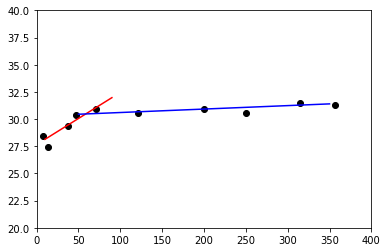

In [17]:
plt.plot(xp1, yp1, c='r', label='Strong sea effect')
plt.plot(xp2, yp2, c='b', label='Light sea effect')
plt.axis((0,400,20,40))
plt.scatter(x, y, c='k', label='data')

In [18]:
print( svr_lin1.coef_)
print( svr_lin1.intercept_)
print( svr_lin2.coef_)
print( svr_lin2.intercept_)


[[0.04794118]]
[27.65617647]
[[0.00317797]]
[30.2854661]


[x,y] = [ 58 , 30 ]


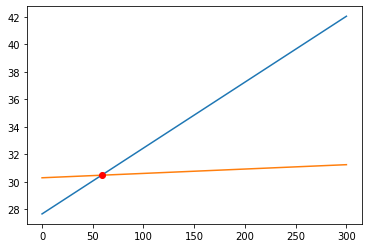

In [19]:
from scipy.optimize import fsolve

def line1(x):
    a1 = svr_lin1.coef_[0][0]
    b1 = svr_lin1.intercept_[0]
    return a1*x + b1
def line2(x):
    a2 = svr_lin2.coef_[0][0]
    b2 = svr_lin2.intercept_[0]
    return a2*x + b2
def findIntersection(fun1,fun2,x0):
 return fsolve(lambda x : fun1(x) - fun2(x),x0)

result = findIntersection(line1,line2,0.0)
print("[x,y] = [ %d , %d ]" % (result,line1(result)))
x = np.linspace(0,300,31)
plt.plot(x,line1(x),x,line2(x),result,line1(result),'ro')

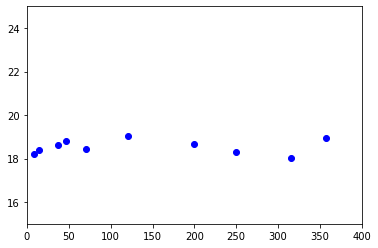

In [20]:
#temperatures min
plt.axis((0,400,15,25))
plt.plot(dist,temp_min,'bo')

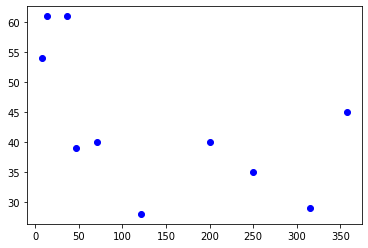

In [21]:
#min humidity
plt.plot(dist,hum_min,'bo')

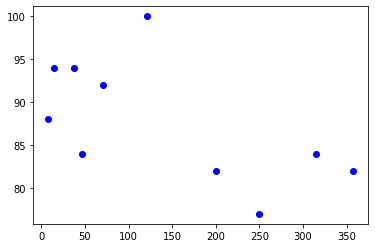

In [22]:
#max humidity
plt.plot(dist,hum_max,'bo')

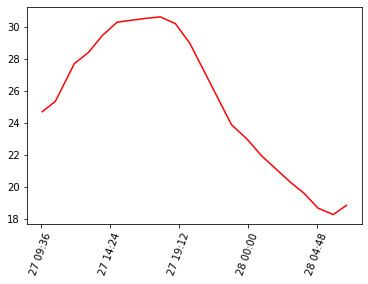

In [23]:
import matplotlib.dates as mtd
#temperature
y1 = df_milano['temp']
x1 = df_milano['day']
ts = [datetime.datetime.strptime(date, '%Y-%m-%d %H:%M:%S') for date in x1]
x = mtd.date2num(ts)
fig, ax = plt.subplots()
plt.xticks(rotation=70)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d %H:%M'))
ax.plot(x,y1,'r')

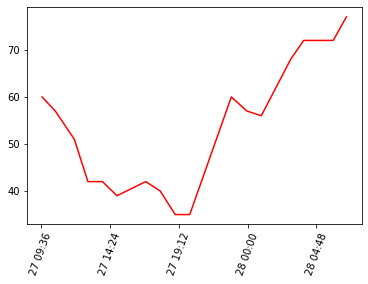

In [24]:
#humidity
y1 = df_milano['humidity']
x1 = df_milano['day']
ts = [datetime.datetime.strptime(date, '%Y-%m-%d %H:%M:%S') for date in x1]
x = mtd.date2num(ts)
fig, ax = plt.subplots()
plt.xticks(rotation=70)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d %H:%M'))
ax.plot(x,y1,'r')

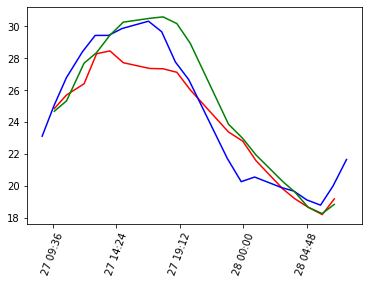

In [25]:
y1 = df_ravenna['temp']
x1 = df_ravenna['day']
y2 = df_ferrara['temp']
x2 = df_ferrara['day']
y3 = df_milano['temp']
x3 = df_milano['day']
ts1 = [datetime.datetime.strptime(date, '%Y-%m-%d %H:%M:%S') for date in x1]
x1 = mtd.date2num(ts1)
ts2 = [datetime.datetime.strptime(date, '%Y-%m-%d %H:%M:%S') for date in x2]
x2 = mtd.date2num(ts2)
ts3 = [datetime.datetime.strptime(date, '%Y-%m-%d %H:%M:%S') for date in x3]
x3 = mtd.date2num(ts3)
fig, ax = plt.subplots()
plt.xticks(rotation=70)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d %H:%M'))
plt.plot(x1,y1,'r',x2,y2,'b',x3,y3,'g')

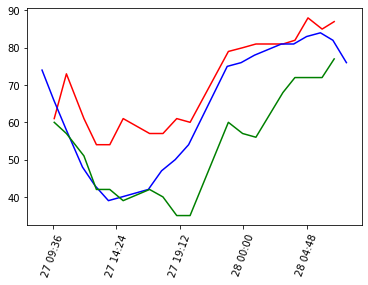

In [26]:
y1 = df_ravenna['humidity']
x1 = df_ravenna['day']
y2 = df_ferrara['humidity']
x2 = df_ferrara['day']
y3 = df_milano['humidity']
x3 = df_milano['day']
ts1 = [datetime.datetime.strptime(date, '%Y-%m-%d %H:%M:%S') for date in x1]
x1 = mtd.date2num(ts1)
ts2 = [datetime.datetime.strptime(date, '%Y-%m-%d %H:%M:%S') for date in x2]
x2 = mtd.date2num(ts2)
ts3 = [datetime.datetime.strptime(date, '%Y-%m-%d %H:%M:%S') for date in x3]
x3 = mtd.date2num(ts3)
fig, ax = plt.subplots()
plt.xticks(rotation=70)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d %H:%M'))
plt.plot(x1,y1,'r',x2,y2,'b',x3,y3,'g')

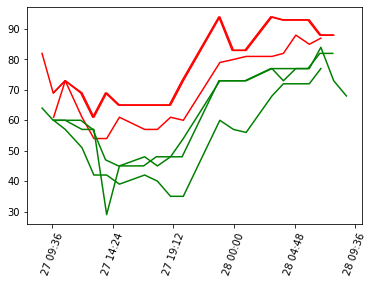

In [27]:
y1 = df_ravenna['humidity']
x1 = df_ravenna['day']
y2 = df_faenza['humidity']
x2 = df_faenza['day']
y3 = df_cesena['humidity']
x3 = df_cesena['day']
y4 = df_milano['humidity']
x4 = df_milano['day']
y5 = df_asti['humidity']
x5 = df_asti['day']
y6 = df_torino['humidity']
x6 = df_torino['day']
ts1 = [datetime.datetime.strptime(date, '%Y-%m-%d %H:%M:%S') for date in x1]
x1 = mtd.date2num(ts1)
ts2 = [datetime.datetime.strptime(date, '%Y-%m-%d %H:%M:%S') for date in x2]
x2 = mtd.date2num(ts2)
ts3 = [datetime.datetime.strptime(date, '%Y-%m-%d %H:%M:%S') for date in x3]
x3 = mtd.date2num(ts3)
ts4 = [datetime.datetime.strptime(date, '%Y-%m-%d %H:%M:%S') for date in x4]
x4 = mtd.date2num(ts4)
ts5 = [datetime.datetime.strptime(date, '%Y-%m-%d %H:%M:%S') for date in x5]
x5 = mtd.date2num(ts5)
ts6 = [datetime.datetime.strptime(date, '%Y-%m-%d %H:%M:%S') for date in x6]
x6 = mtd.date2num(ts6)
fig, ax = plt.subplots()
plt.xticks(rotation=70)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d %H:%M'))
plt.plot(x1,y1,'r',x2,y2,'r',x3,y3,'r')
plt.plot(x4,y4,'g',x5,y5,'g',x6,y6,'g')

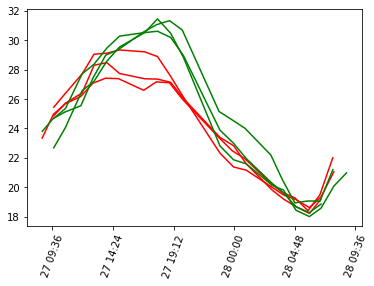

In [28]:
y1 = df_ravenna['temp']
x1 = df_ravenna['day']
y2 = df_faenza['temp']
x2 = df_faenza['day']
y3 = df_cesena['temp']
x3 = df_cesena['day']
y4 = df_milano['temp']
x4 = df_milano['day']
y5 = df_asti['temp']
x5 = df_asti['day']
y6 = df_torino['temp']
x6 = df_torino['day']
ts1 = [datetime.datetime.strptime(date, '%Y-%m-%d %H:%M:%S') for date in x1]
x1 = mtd.date2num(ts1)
ts2 = [datetime.datetime.strptime(date, '%Y-%m-%d %H:%M:%S') for date in x2]
x2 = mtd.date2num(ts2)
ts3 = [datetime.datetime.strptime(date, '%Y-%m-%d %H:%M:%S') for date in x3]
x3 = mtd.date2num(ts3)
ts4 = [datetime.datetime.strptime(date, '%Y-%m-%d %H:%M:%S') for date in x4]
x4 = mtd.date2num(ts4)
ts5 = [datetime.datetime.strptime(date, '%Y-%m-%d %H:%M:%S') for date in x5]
x5 = mtd.date2num(ts5)
ts6 = [datetime.datetime.strptime(date, '%Y-%m-%d %H:%M:%S') for date in x6]
x6 = mtd.date2num(ts6)
fig, ax = plt.subplots()
plt.xticks(rotation=70)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d %H:%M'))
plt.plot(x1,y1,'r',x2,y2,'r',x3,y3,'r')
plt.plot(x4,y4,'g',x5,y5,'g',x6,y6,'g')

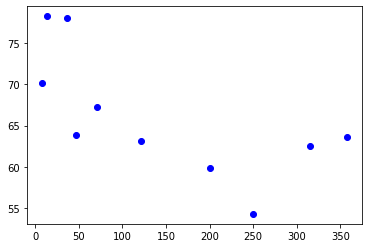

In [29]:
hum_mean = [df_ravenna['humidity'].mean(),
     df_cesena['humidity'].mean(),
     df_faenza['humidity'].mean(),
     df_ferrara['humidity'].mean(),
     df_bologna['humidity'].mean(),
     df_mantova['humidity'].mean(),
     df_piacenza['humidity'].mean(),
     df_milano['humidity'].mean(),
     df_asti['humidity'].mean(),
     df_torino['humidity'].mean()
]
plt.plot(dist,hum_mean,'bo')

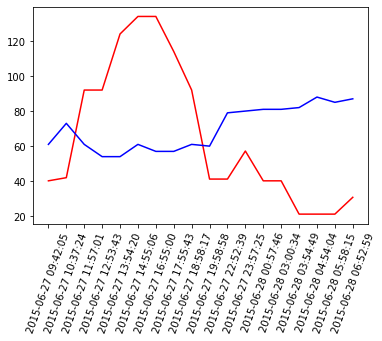

In [30]:
y1 = df_ravenna['wind_speed']*20
y2 = df_ravenna['humidity']
x = df_ravenna['day']
fig, ax = plt.subplots()
plt.xticks(rotation=70)
#hours = mdates.DateFormatter('%H:%M')
#ax.xaxis.set_major_formatter(hours)
plt.plot(x,y1,'r',x,y2,'b')

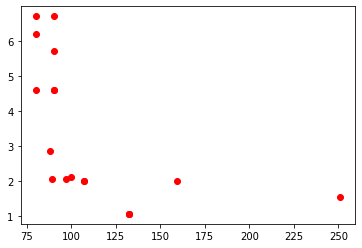

In [31]:
plt.plot(df_ravenna['wind_deg'],df_ravenna['wind_speed'],'ro')

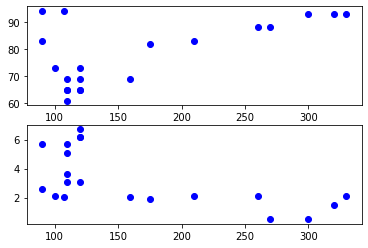

In [32]:
plt.subplot(211)
plt.plot(df_cesena['wind_deg'],df_cesena['humidity'],'bo')
plt.subplot(212)
plt.plot(df_cesena['wind_deg'],df_cesena['wind_speed'],'bo')

In [33]:
df_ravenna[['wind_deg','wind_speed','day']]

,wind_deg,wind_speed,day
0,159.5000,2.01,2015-06-27 09:42:05
1,100.0000,2.10,2015-06-27 10:37:24
2,80.0000,4.60,2015-06-27 11:57:01
3,90.0000,4.60,2015-06-27 12:53:43
4,80.0000,6.20,2015-06-27 13:54:20
5,80.0000,6.70,2015-06-27 14:55:06
6,90.0000,6.70,2015-06-27 16:55:00
7,90.0000,5.70,2015-06-27 17:55:43
8,90.0000,4.60,2015-06-27 18:58:17
9,97.0000,2.06,2015-06-27 19:58:58


In [34]:
df_cesena[['wind_deg','wind_speed']]

,wind_deg,wind_speed
0,175.511,1.91
1,159.500,2.01
2,100.000,2.10
3,120.000,3.10
4,110.000,3.10
5,110.000,3.60
6,110.000,5.70
7,110.000,5.10
8,120.000,6.20
9,120.000,6.70


In [35]:
hist, bins = np.histogram(df_ravenna['wind_deg'],8,[0,360])
print(hist)
print(bins)

[ 0  5 11  1  0  1  0  0]
[  0.  45.  90. 135. 180. 225. 270. 315. 360.]


In [36]:
def showRoseWind(values,city_name,max_value):
   N = 8
   theta = np.arange(0.,2 * np.pi, 2 * np.pi / N)
   radii = np.array(values)
   plt.axes([0.025, 0.025, 0.95, 0.95], polar=True)
   colors = [(1-x/max_value, 1-x/max_value, 0.75) for x in radii]
   plt.bar(theta+np.pi/8, radii, width=(2*np.pi/N), bottom=0.0, color=colors)
   plt.title(city_name,x=0.2, fontsize=20)

[ 0  5 11  1  0  1  0  0]


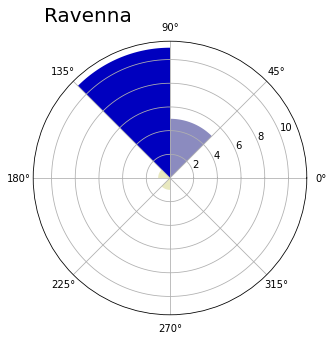

In [37]:
hist, bin = np.histogram(df_ravenna['wind_deg'],8,[0,360])
print(hist)
showRoseWind(hist,'Ravenna', max(hist))

[4 3 0 4 0 2 5 2]


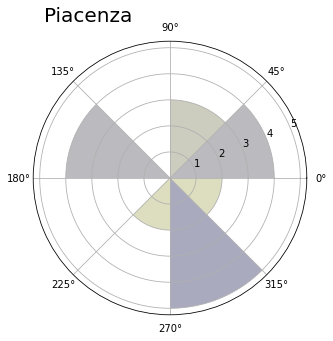

In [38]:
hist, bin = np.histogram(df_piacenza['wind_deg'],8,[0,360])
print(hist)
showRoseWind(hist,'Piacenza', 15.0)


In [39]:
print(df_milano[df_milano['wind_deg']<45]['wind_speed'])
print(df_milano[df_milano['wind_deg']<45]['wind_speed'].mean())


15    2.6
16    2.6
17    0.5
Name: wind_speed, dtype: float64
1.9000000000000001


In [40]:
#print(df_milano[df_milano['wind_deg']<45]['wind_speed'].mean())
print(df_milano[(df_milano['wind_deg']>0) & (df_milano['wind_deg']<45)]['wind_speed'].mean())
print(df_milano[(df_milano['wind_deg']>44) & (df_milano['wind_deg']<90)]['wind_speed'].mean())
print(df_milano[(df_milano['wind_deg']>89) & (df_milano['wind_deg']<135)]['wind_speed'].mean())
print(df_milano[(df_milano['wind_deg']>134) & (df_milano['wind_deg']<180)]['wind_speed'].mean())
print(df_milano[(df_milano['wind_deg']>179) & (df_milano['wind_deg']<225)]['wind_speed'].mean())
print(df_milano[(df_milano['wind_deg']>224) & (df_milano['wind_deg']<270)]['wind_speed'].mean())
print(df_milano[(df_milano['wind_deg']>269) & (df_milano['wind_deg']<315)]['wind_speed'].mean())
print(df_milano[(df_milano['wind_deg']>314) & (df_milano['wind_deg']<360)]['wind_speed'].mean())
#print(df_milano[df_milano['wind_deg']>314]['wind_speed'].mean())

2.6
2.6
3.5999999999999996
2.35
2.25
2.35
2.05
nan


In [41]:
degs = np.arange(45,361,45)
print(degs)

[ 45  90 135 180 225 270 315 360]


In [42]:
tmp =  []
for deg in degs:
    #print df_milano[(df_milano['wind_deg']>(deg-46)) & (df_milano['wind_deg']<deg)]['wind_speed'].mean()
    tmp.append(df_milano[(df_milano['wind_deg']>(deg-46)) & (df_milano['wind_deg']<deg)]['wind_speed'].mean())
speeds = np.array(tmp)
print(speeds)
speeds = np.nan_to_num(speeds)
print(speeds)

[1.9  2.6  3.6  2.35 2.25 2.35 2.05  nan]
[1.9  2.6  3.6  2.35 2.25 2.35 2.05 0.  ]


Text(0.2, 1.05, 'Milano')

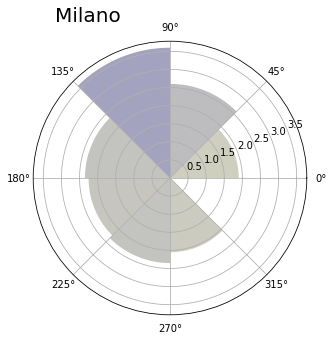

In [43]:
N = 8
theta = np.arange(0,2 * np.pi, 2 * np.pi / N)
radii = np.array(speeds)
plt.axes([0.025, 0.025, 0.95, 0.95], polar=True)
colors = [(1-x/10.0, 1-x/10.0, 0.75) for x in radii]
bars = plt.bar(theta+np.pi/8, radii, width=(2*np.pi/N), bottom=0.0, color=colors)
plt.title('Milano',x=0.2, fontsize=20)


In [44]:
def RoseWind_Speed(df_city):
   degs = np.arange(45,361,45)
   tmp =  []
   for deg in degs:
      tmp.append(df_city[(df_city['wind_deg']>(deg-46)) & (df_city['wind_deg']<deg)]['wind_speed'].mean())
   return np.nan_to_num(tmp)

In [45]:
def showRoseWind_Speed(speeds,city_name):
    N = 8
    theta = np.arange(0,2 * np.pi, 2 * np.pi / N)
    radii = np.array(speeds)
    plt.axes([0.025, 0.025, 0.95, 0.95], polar=True)
    colors = [(1-x/10.0, 1-x/10.0, 0.75) for x in radii]
    bars = plt.bar(theta+np.pi/8, radii, width=(2*np.pi/N), bottom=0.0, color=colors)
    plt.title(city_name,x=0.2, fontsize=20)


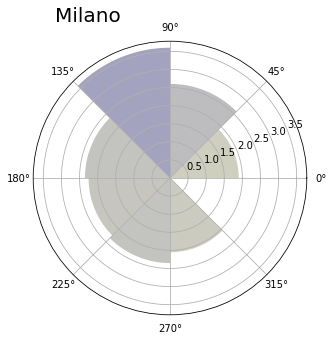

In [46]:
showRoseWind_Speed(RoseWind_Speed(df_milano),'Milano')

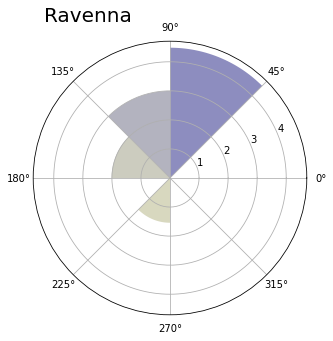

In [47]:
showRoseWind_Speed(RoseWind_Speed(df_ravenna),'Ravenna')

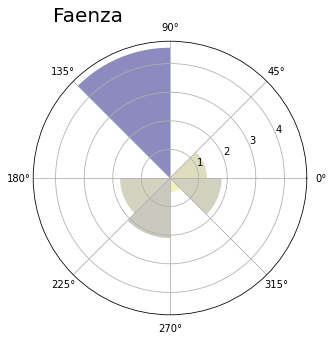

In [48]:
showRoseWind_Speed(RoseWind_Speed(df_faenza),'Faenza')

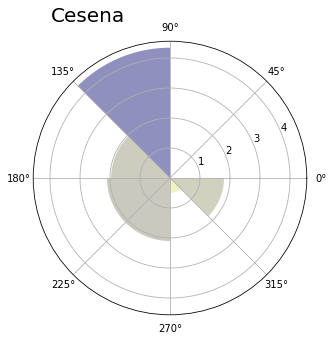

In [49]:
showRoseWind_Speed(RoseWind_Speed(df_cesena),'Cesena')

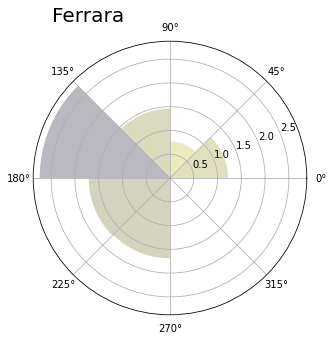

In [50]:
showRoseWind_Speed(RoseWind_Speed(df_ferrara),'Ferrara')

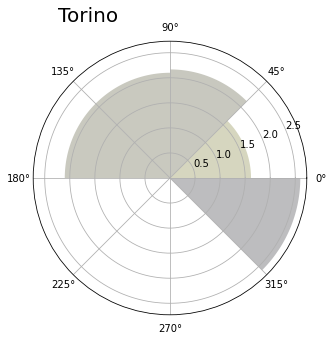

In [51]:
showRoseWind_Speed(RoseWind_Speed(df_torino),'Torino')

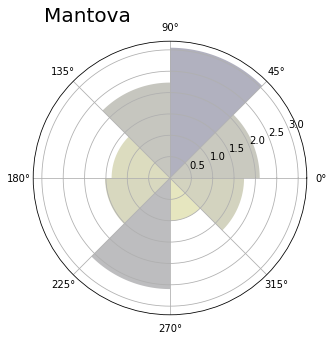

In [52]:
showRoseWind_Speed(RoseWind_Speed(df_mantova),'Mantova')

In [53]:
df_ferrara.to_csv('ferrara.csv')
df_milano.to_csv('milano.csv')
df_mantova.to_csv('mantova.csv')
df_ravenna.to_csv('ravenna.csv')
df_torino.to_csv('torino.csv')
df_asti.to_csv('asti.csv')
df_bologna.to_csv('bologna.csv')
df_piacenza.to_csv('piacenza.csv')
df_cesena.to_csv('cesena.csv')
df_faenza.to_csv('faenza.csv')